4422102/4422102 [==============================] - 2s 1us/step


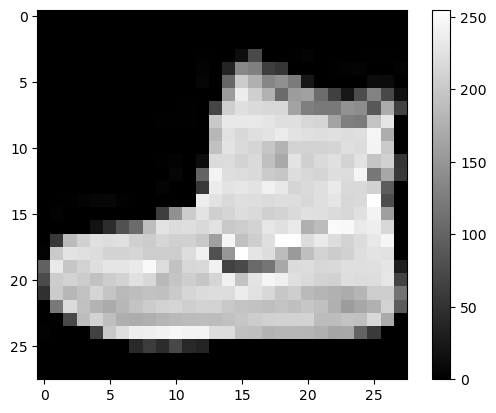

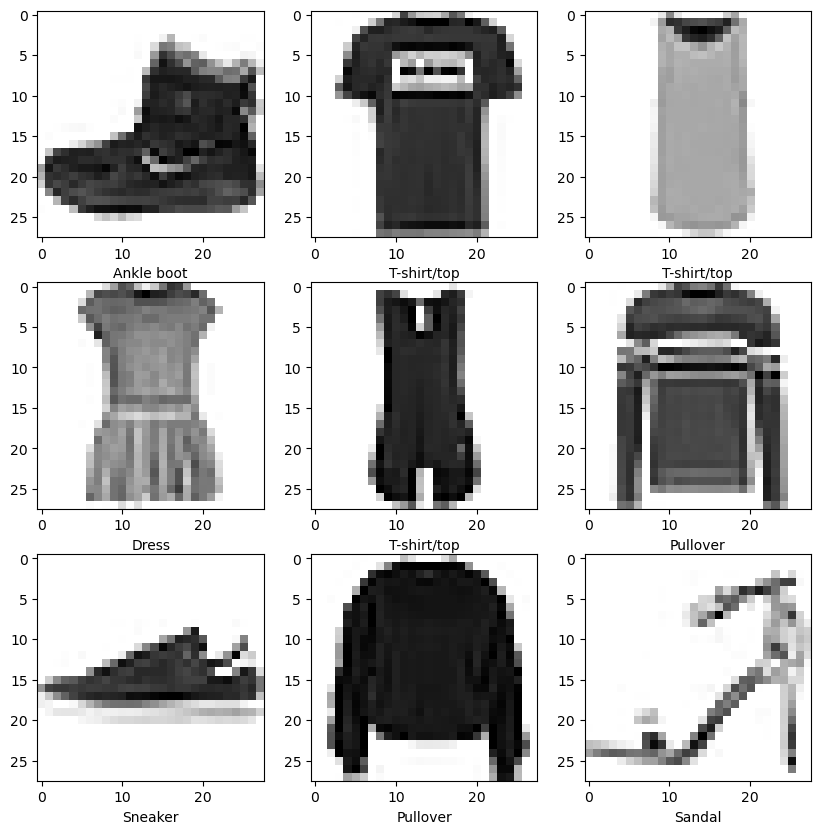

In [5]:
# Training an Image Classifer for Fashion MNIST

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers  # type: ignore
from tensorflow.keras.utils import plot_model  # type: ignore
import numpy as np
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Class names for the labels
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

# Explore the data
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)

# Preprocess the data
plt.figure()
plt.imshow(train_images[0], cmap="gray")
plt.colorbar()
plt.grid(False)
plt.show()

# Scale the values to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Display the first 9 images from the training set and display the class
# name below each image
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    # plt.xticks([])
    # plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 dropout (Dropout)           (None, 3, 3, 64)          0

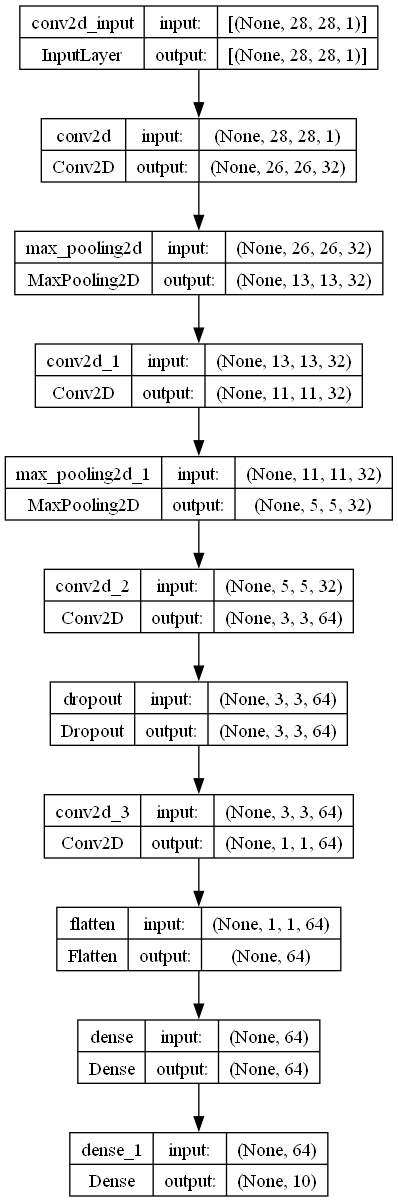

In [2]:
# Initialize the model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))

# Add a MaxPooling2D layer to reduce the size of the feature map
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

# Dropout layer to prevent overfitting by randomly dropping out nodes
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

# Flatten the tensor output for the fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))


model.add(layers.Dense(10, activation="softmax"))

# Visualize the model
model.summary()

# Plot the model
plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [3]:
# Train the model
model.compile(
    optimizer="adam",  # Optimizer
    loss="sparse_categorical_crossentropy",  # loss function for integer labels
    metrics=["accuracy"],  # report accuracy during training
)

# Reshape the data to add a single grayscale channel
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    validation_data=(test_images, test_labels),
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

Epoch 1/10
1875/1875 [==============================] - 15s 5ms/step - loss: 0.5634 - accuracy: 0.7891 - val_loss: 0.4109 - val_accuracy: 0.8461
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3645 - accuracy: 0.8663 - val_loss: 0.3330 - val_accuracy: 0.8800
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3185 - accuracy: 0.8826 - val_loss: 0.3380 - val_accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2888 - accuracy: 0.8931 - val_loss: 0.2869 - val_accuracy: 0.8957
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2701 - accuracy: 0.9008 - val_loss: 0.2686 - val_accuracy: 0.9013
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2535 - accuracy: 0.9064 - val_loss: 0.2769 - val_accuracy: 0.8989
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2404 - accuracy: 0.9107 - val_loss: 0.2617 - val_accuracy

313/313 [==============================] - 1s 2ms/step


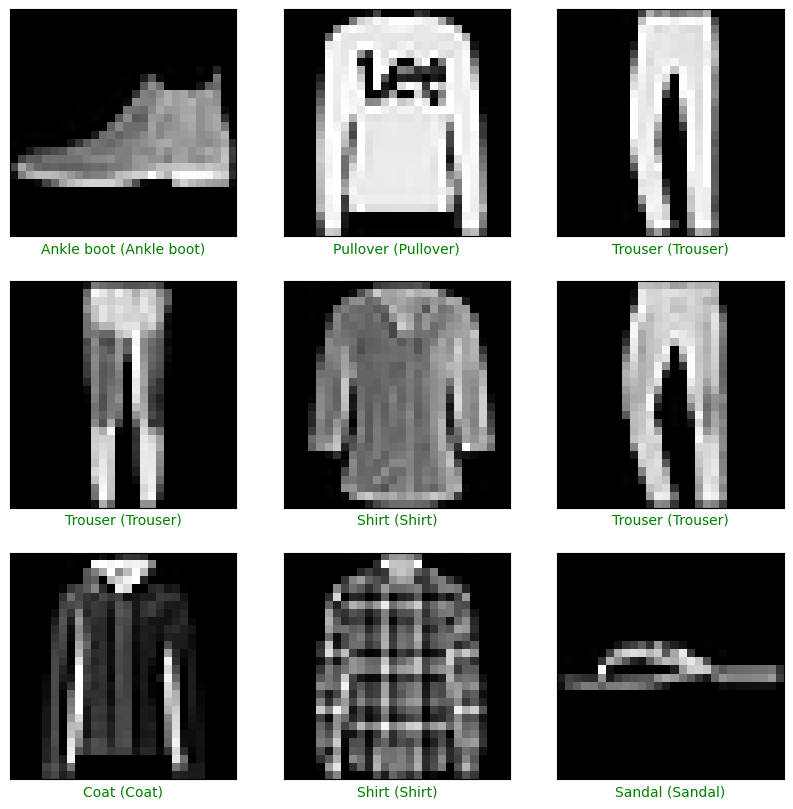

In [4]:
predictions = model.predict(test_images)

# Plot the first 9 test images, their predicted labels, and the true labels
# Color correct predictions in green and incorrect predictions in red
num_rows = 3
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = "green"
    else:
        color = "red"
    plt.xlabel(
        "{} ({})".format(class_names[predicted_label], class_names[true_label]),
        color=color,
    )
plt.show()